The below is an example for Time Series Forecasting - Univariate without Exogenous Variables - London bike sharing dataset

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 96.7 MB/s eta 0:

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [48]:
df = pd.read_csv('london_merged.csv')

In [49]:
# Convert the 'timestamp' column to datetime format and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

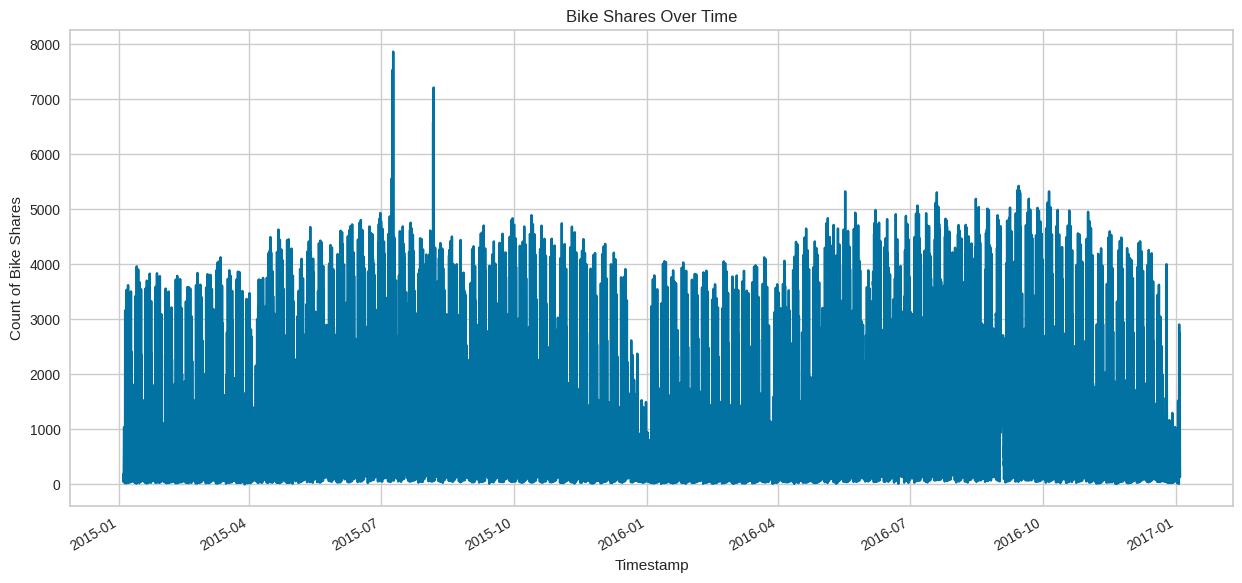

In [50]:
plt.figure(figsize=(15,7))
df['cnt'].plot(title='Bike Shares Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count of Bike Shares')
plt.grid(True)
plt.show()

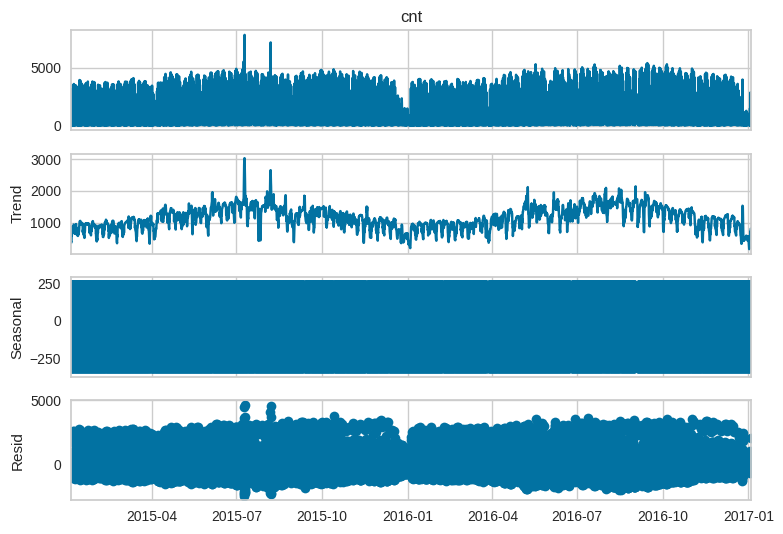

In [51]:
result = seasonal_decompose(df['cnt'], model='additive', period=24)
result.plot()
plt.tight_layout()
plt.show()

In [52]:
train = df['cnt'][:-72]
test = df['cnt'][-72:]

In [53]:
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=24)
fit_model = model.fit()

In [54]:
predictions = fit_model.forecast(steps=72)

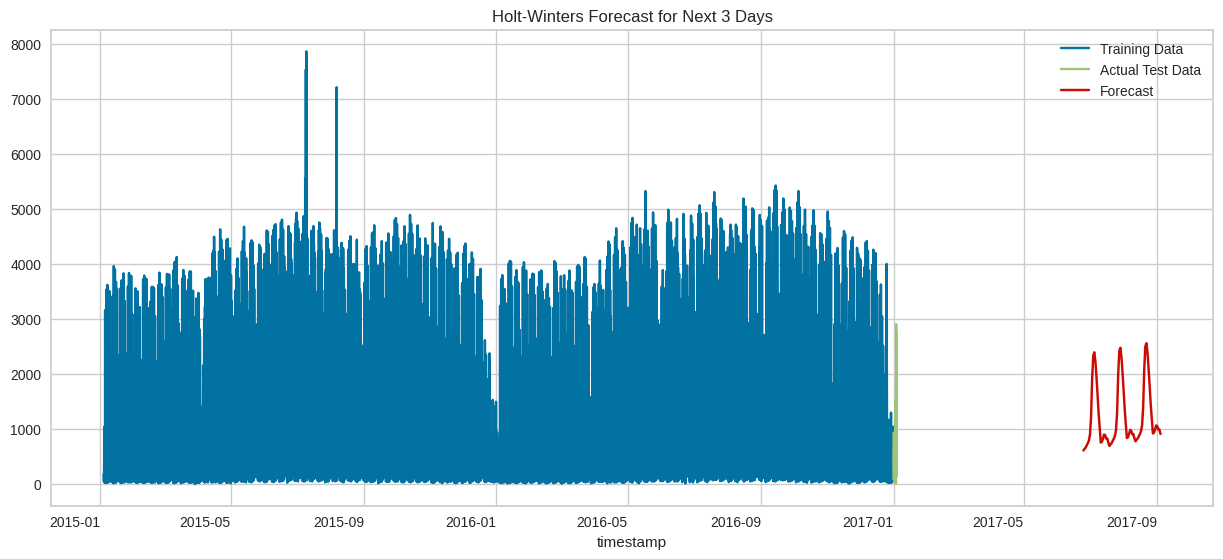

In [55]:
plt.figure(figsize=(15,7))
train.plot(label='Training Data', legend=True)
test.plot(label='Actual Test Data', legend=True)
predictions.plot(label='Forecast', legend=True)
plt.title('Holt-Winters Forecast for Next 3 Days')
plt.grid(True)
plt.show()

In [56]:
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 986741.6148188184


Below is an example for Time Series Forecasting - Univariate with Exogenous Variables - London bike sharing dataset

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [58]:
df = pd.read_csv('london_merged.csv')


In [59]:
# Convert the 'timestamp' column to datetime format and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

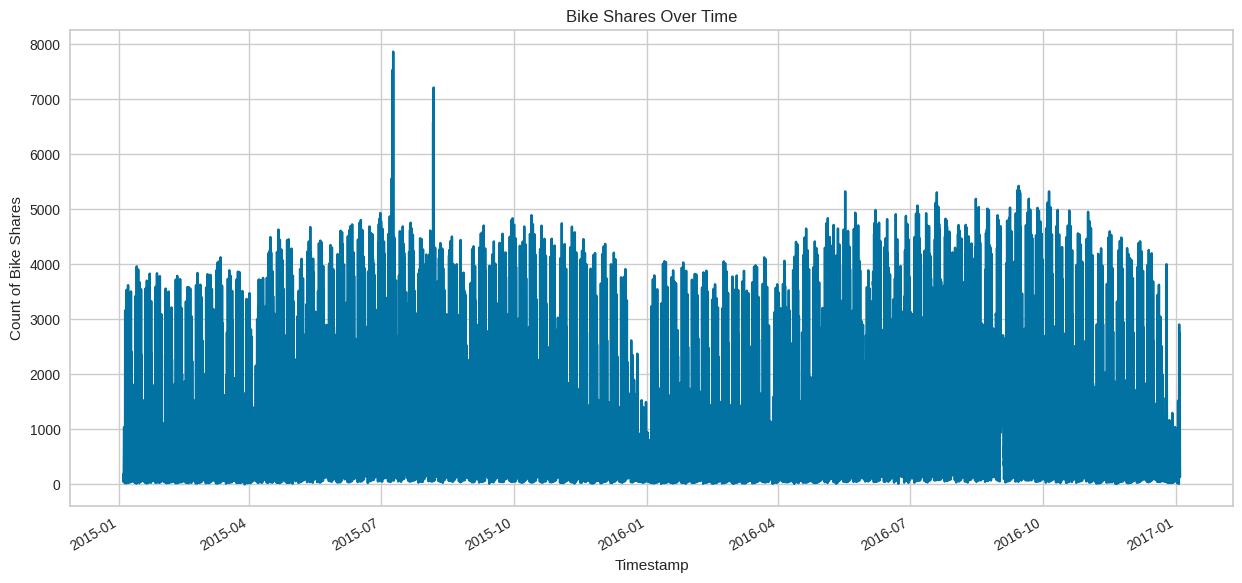

In [60]:
plt.figure(figsize=(15,7))
df['cnt'].plot(title='Bike Shares Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count of Bike Shares')
plt.grid(True)
plt.show()

In [61]:
train = df[:-72]
test = df[-72:]

In [62]:
# Define exogenous variables; for instance, ['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season']
exog_vars = train[['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season']]

model = SARIMAX(train['cnt'], exog=exog_vars, order=(1, 0, 1), seasonal_order=(1, 1, 1, 24))
fit_model = model.fit(disp=False)

In [63]:
exog_test = test[['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season']]
predictions = fit_model.forecast(steps=72, exog=exog_test)

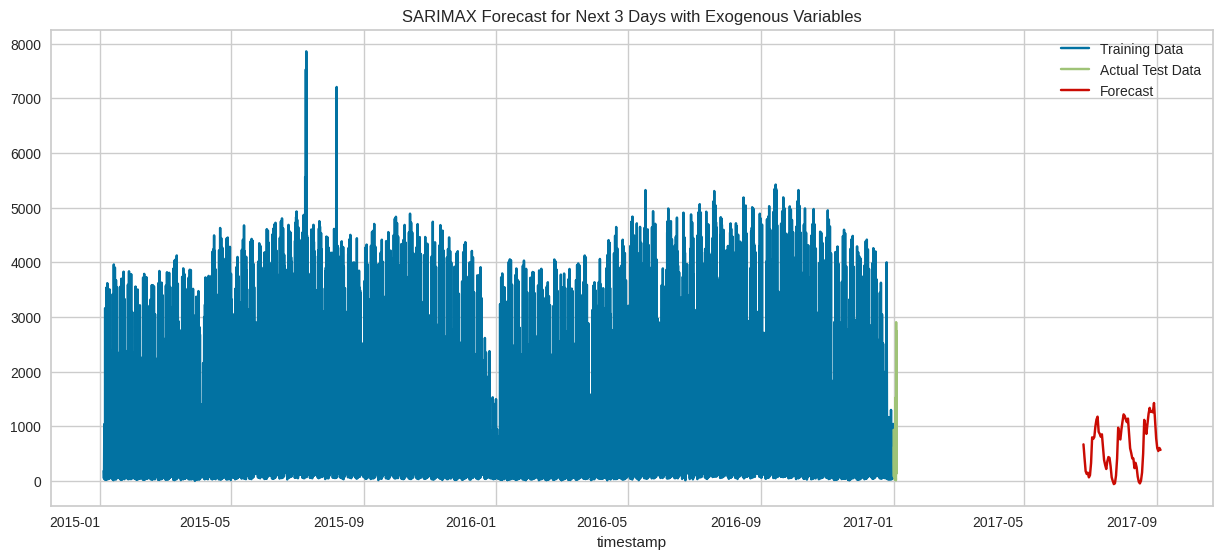

In [64]:
plt.figure(figsize=(15,7))
train['cnt'].plot(label='Training Data', legend=True)
test['cnt'].plot(label='Actual Test Data', legend=True)
predictions.plot(label='Forecast', legend=True)
plt.title('SARIMAX Forecast for Next 3 Days with Exogenous Variables')
plt.grid(True)
plt.show()

In [65]:
mse = mean_squared_error(test['cnt'], predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 213981.2053021364
